# DSA 5113 Particle Swarm Optimization Code

# Libraries

In [3]:
import copy
import math
from random import Random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle

# Question 2 - Particle Swarm Optimization

## Given Parameters

In [4]:
seed = 12345
myPRNG = Random(seed)

## Particle Class

In [ ]:
class Particle: #creates particles to be put into our "swarm"
    
    def __init__(self, 
                 dimensions,
                 lowVelo=-10, #next 4 parameters have defaults; recommend overriding them
                 highVelo=10,
                 phi1=1.2,
                 phi2=1.2):
        
        '''
        takes dimensions, max/min velocity and max/min phi as arguments
        initializes framework for particle, and then intializes position/velocity
        '''
        
        self.d = dimensions #from argument, number of dimensions
        self.lp = -500 #bounds for Schwefel Function search space
        self.up = 500
        self.lv = lowVelo #from argument, lower velocity bound
        self.hv = highVelo #from argument, upper velocity bound
        self.p1 = phi1 #from argument, phi1
        self.p2 = phi2 #from argument, phi2
        self.initPart() #calls the initPart() function to get rest of particle specs
        
    def initPart(self):
        
        '''
        takes no arguments
        initializes position/velocity for particle
        sets current position and objective value as the best position and best value for particle
        '''
        
        self.pos = [myPRNG.uniform(self.lp,self.up) for j in range(self.d)] #randomly initialize position in feasible space
        self.vel = [myPRNG.uniform(self.lv,self.hv) for j in range(self.d)] #randomly initialize velocity in legal range
        self.evaluate() #gets objective value
        self.bestp = self.pos[:] #sets best position of particle
        self.bestval = self.val #sets best value of particle
        
        return #return nothing
    
    def evaluate(self):          
        
        '''
        takes no arguments
        sets the current particle objective value to the current objective evaluation
        punishes movement into infeasible space
        '''
        
        val = 0 #initialize subtrahend of objective function
        for i in range(self.d): #iterate through dimensions
            val = val + self.pos[i]*math.sin(math.sqrt(abs(self.pos[i]))) #calculate value for each dimension
            
            if abs(self.pos[i]) > 500: #punish move to infeasible space
                val = val - 1000 #subtracts 1000 from subtrahend, which adds 1000 to objective value
                                       
        self.val = 418.9829*self.d - val #complete objective function calculation for all dimensions
        
        return #return nothing
    
    def checkBest(self):
        
        '''
        takes no arguments
        checks to see if current objective value is better than alltime best
        if so, it updates alltime best
        '''
        
        if self.val < self.bestval: #check current objective value against best value
            self.bestval = self.val #if it's less than, update best value
            self.bestp = self.pos[:] #and update best position
        
        return #return nothing
    
    def move(self):
        
        '''
        takes no arguments
        updates position attribute based on velocity
        '''
        
        self.pos = [x + y for x,y in zip(self.pos,self.vel)] #adds velocity value to position value for each dimension

        return
    
    def pivot(self, gbest):
        
        '''
        takes global best position as argument
        updates velocity based on the phi attribute, a randomly generated r, and the local/global bests
        '''
        
        phixr1 = myPRNG.random()*self.p1 #get the phi1*r1 scalar from randomly generated r and phi1 attribute
        phixr2 = myPRNG.random()*self.p2 #get the phi2*r2 scalar from randomly generated r and phi2 attribute
        
        self.vel = [(self.vel[i] + phixr1*(self.bestp[i]-self.pos[i]) + phixr2*(gbest[i]-self.pos[i])) for i in range(self.d)]
        #use list comprehension to update velocity based on current velocity and local/global bests for each dimension
        
        self.vel = [self.lv if velo < self.lv else self.hv if velo > self.hv else velo for velo in self.vel]
        #for each dimension, check to see that velocity is in legal range; fix if not
        
        return #return nothing
    
    def update(self, gbest):
        
        '''
        takes global best as argument
        updates velocity, then updates position, then checks objective funcion and finally checks current value vs best
        '''
        
        self.pivot(gbest) #update velocity
        self.move() #update position
        self.evaluate() #update objective value
        self.checkBest() #check to see if new local best found
        
        return #return nothing
    
    def flip(self):
        
        self.pos = [-p for p in self.pos]
        
        return

## Swarm Class

In [81]:
class Swarm: #creates swarm made up of particles
    
    
    def __init__(self,
                 dimensions,
                 swarmSize,
                 generations,
                 lowVelo=-1, #next 4 parameters have defaults, recommend overriding them
                 highVelo=-1,
                 phi1=1.2,
                 phi2=1.2):
        
        '''
        takes dimensions, swarm size, number of generations and velocity/phi values as arguments
        initializes swarm attributes
        '''
        
        self.lp = -500 #bounds for Schwefel Function search space
        self.up = 500
        self.d = dimensions #from argument, particle dimensions
        self.s = swarmSize #from argument, size of swarm
        self.lv = lowVelo #from argument, velocity lower bound
        self.hv = highVelo #from argument, velocity upper bound
        self.p1 = phi1 #from argument, phi1 value
        self.p2 = phi2 #from argument, phi2 value
        self.g = generations #from argument, number of swarm updated to perform
        self.gbval = 1000*self.d #starting place for global best value, bad score, should be easy to beat
        self.initializeSwarm() #calls initialize swarm to get particles for swarm
        self.findBest() #find the current best particle/score
        if self.d == 2:
            self.visualizeSwarm()
        
    
    def initializeSwarm(self):
        
        '''
        takes no arguments
        initializes n=swarm size number of particles
        '''
        
        self.particles = [Particle(self.d,self.lv,self.hv,self.p1,self.p2) for i in range(self.s)]
        #list comprehension to get list of particles for particles attribute
            
        return #return nothing
        
    
    def findBest(self):
        
        '''
        takes no arguments
        checks each particle and updates global best if necessary
        '''
        
        for particle in self.particles: #iterate through particles
            if particle.val < self.gbval: #check to see if objective val < global best
                self.gbval = particle.val #if so, update global best value
                self.gbest = particle.pos[:] #and update global best position
        
        return #return nothing
    
    def moveSwarm(self):
        
        '''
        takes no arguments
        calls the update method for each particle
        '''
        
        for particle in self.particles: #iterate through particles in swarm
            particle.update(self.gbest) #call update method to change velocity/position
        
        return #return nothing
    
    def swarmUpdate(self):
        
        '''
        takes no arguments
        updates swarm and checks to see if new global best is found
        '''
        self.moveSwarm() #updates swarm positions
        self.findBest() #checks for new global best
        
        return #returns nothing
    
    def visualizeSwarm(self, initial=True, run=1): #TODO: make prettier
        
        '''
        takes initial flag and run number as arguments
        plots current swarm positions in 2-d
        '''
        
        x = [item.pos[0] for item in self.particles] #create list of x-values to plot
        y = [item.pos[1] for item in self.particles] #create list of y-values to plot
        
        vx = [item.vel[0] for item in self.particles]
        vy = [item.vel[1] for item in self.particles]
        
        plt.plot(x,y,'o') #initialize plot
        
        for px,py,pvx,pvy in zip(x,y,vx,vy):
            plt.arrow(px,py,pvx,pvy,width=4,color='black')
        plt.xlim(-650,650)
        plt.ylim(-650,650)
        
        #plt.arrow(x,y,vx,vy)
        
        if initial: #conditional for plot title
            plt.title('Spatial Plotting of Initial Solutions')
        else:
            plt.title(f'Spatial Plotting of Iteration {run}')
        
        plt.xlabel('x values') #add labels
        plt.ylabel('y values')
        plt.show() #show plot
        
        return #return nothing
        
    def flipSwarm(self):
        
        for p in self.particles:
            p.flip()
        
        return
    
    def swarmFind(self):
        
        '''
        takes no arguments
        performs particle swarm for self.g number of iterations
        best value and position can be accessed from self.gbval and self.gbest after running this function
        '''
        
        solnsChecked = 0 #initialize counter
        
        for i in range(self.g): #iterate through length of swarm
            
            self.swarmUpdate() #call update function
            
            solnsChecked += self.s #add 1*swarm size iterations to counter
            
            if (i == 1) and (self.d == 2):
                self.visualizeSwarm(False)
            #if i == self.g/2:
            #    self.flipSwarm()

        print(f'Best value: {round(self.gbval,3)}\nBest Particle: {[round(x,3) for x in self.gbest]}') #print results
        print(f'Total Particles Evaluated: {solnsChecked}') #print iterations
        
        return

## Question 2b

### But first, some grid searching

In [158]:
def psoGridSearch(phi1l, phi2l, vell):
    
    vel_dict = {}
    for vel in vell:
        
        phi1_dict = {}
        for phi1 in phi1l:
            
            phi2_dict = {}
            for phi2 in phi2l:
                
                bests = []
                for i in range(10):
                    
                    pso = Swarm(2,5,20000,-vel,vel,phi1,phi2)
                    pso.swarmFind()
                    bests.append(pso.gbval)
                phi2_dict[phi2] = np.mean(np.array(bests))
            phi1_dict[phi1] = phi2_dict
        df = pd.DataFrame(phi1_dict)
        vel_dict[vel] = df
                
                
    
    return vel_dict

In [159]:
phi1s = [0.4, 0.8, 1.2, 1.6, 2, 2.5, 3, 3.5] #initialize phi values
phi2s = [0.4, 0.8, 1.2, 1.6, 2, 2.5, 3, 3.5]
vel_list = [1,5,10,20,35,50,75,100,150,200] #initialize velocities

In [181]:
#used pickle to save some time; if there's a pickle, load it, otherwise perform grid search

if os.path.isfile('psoGridSearch.pkl'):
    dict1 = pickle.load( open( "psoGridSearch.pkl", "rb" ) )
else:
    dict1 = weirdGridSearch(phi1s,phi2s,vel_list)
    pickle.dump(dict1, open( "psoGridSearch.pkl", "wb" ) )


In [182]:
#because a dictionary of dataframes was returned, they needed to be investigated manually
#the velocity of 150 had the best average contained in it, so it's displayed here
dict1[150]

,0.4,0.8,1.2,1.6,2.0,2.5,3.0,3.5
0.4,94.751332,94.751081,118.438951,142.126758,71.063237,138.179404,138.179586,165.819450
0.8,94.751363,23.688375,71.063616,47.376063,94.751351,94.752376,165.814165,165.813959
1.2,23.690559,161.866666,118.448729,118.438767,142.127011,118.438818,71.063548,94.751648
1.6,142.127349,94.750893,165.814277,118.438879,71.063223,71.063156,142.126444,90.803541
2.0,142.126619,94.751108,71.063899,118.439116,94.756497,94.751110,71.064833,94.751032
2.5,71.063441,47.376540,142.126965,118.446840,94.752258,71.063530,71.063749,71.063873
3.0,118.438562,165.813743,142.126673,165.813753,67.115993,209.244317,71.063232,71.063386
3.5,213.189872,94.752067,118.438795,118.439269,138.178893,118.439206,71.063277,90.803740


### Answer to 2b

In [45]:
#number of dimensions of problem
dimensionsb = 2

#generations, our stopping criterion
generationsb = 100000

#number of particles in swarm
swarmSizeb = 5

#velocity range
lowVelb = -150
highVelb = 150

#phi values

phi1b = 0.8
phi2b = 0.8

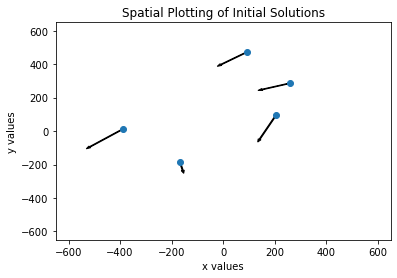

In [46]:
#initialize swarm with specified parameters
swar2b = Swarm(dimensionsb, swarmSizeb, generationsb, lowVelb, highVelb, phi1b, phi2b)

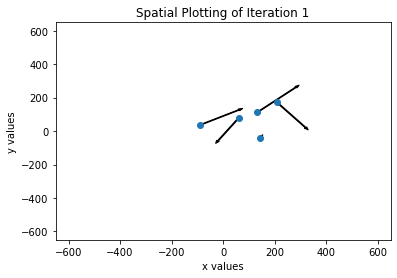

Best value: 0.0
Best Particle: [420.967, 420.967]
Total Particles Evaluated: 500000
Wall time: 4.1 s


In [47]:
### perform PSO
%time swar2b.swarmFind()

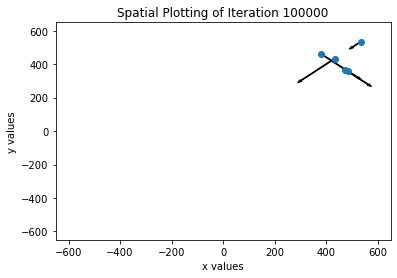

In [48]:
#visualize
swar2b.visualizeSwarm(False,generationsb)

## Question 2c

In [82]:
#number of dimensions of problem
dimensionsc = 200

#generations, our stopping criterion
generationsc = 10000

#number of particles in swarm
swarmSizec = 200

#velocity range
lowVelc = -150
highVelc = 150

#phi values

phi1c = 0.8
phi2c = 0.8

In [83]:
#initialize swarm with given parameters
swar2c = Swarm(dimensionsc, swarmSizec, generationsc, lowVelc, highVelc, phi1c, phi2c)

In [84]:
#perform PSO
%time swar2c.swarmFind()

Best value: 46330.53
Best Particle: [72.636, 214.195, -128.432, 19.61, -106.134, -125.166, -123.495, 60.86, -16.637, -18.804, 62.181, 64.188, 205.345, -131.592, 200.171, 210.908, 420.176, 60.472, -108.753, 192.322, -298.611, -299.315, -121.162, -294.037, -32.3, 425.861, 204.334, -291.988, 52.401, 72.528, -300.584, -137.734, -118.316, 213.722, 68.658, 405.251, -116.687, -496.498, 19.839, -302.646, -297.336, -129.676, 202.458, -297.002, 66.735, -313.358, -302.706, 205.285, 417.938, 198.889, 431.296, -109.36, -272.88, 416.376, 200.514, -140.125, 426.939, -140.251, 67.293, 63.402, 207.246, -126.707, -309.804, -132.861, 78.992, -127.207, 426.931, 68.372, -121.522, 10.262, -308.708, -296.659, 430.897, -301.486, 215.048, -295.937, -309.202, 208.521, -305.702, 65.159, 422.961, 205.106, 65.112, -295.982, -130.735, 197.915, -305.057, 407.195, -139.321, -130.185, 60.751, -300.906, 200.987, -288.48, -116.116, 194.946, 212.273, 201.571, -323.238, -131.336, -498.53, 217.134, -297.419, 56.842, -20.67

## Question 2d

## Fancy Particle Class
#### Rather than go back and edit the original, it seemed easier to just come up with a new class

In [145]:
class FancyParticle: #creates particles to be put into our "swarm"
    
    def __init__(self, 
                 dimensions,
                 lowVelo=-10, #next 4 parameters have defaults; recommend overriding them
                 highVelo=10,
                 phi1=2.05,
                 phi2=2.05):
        
        '''
        takes dimensions, max/min velocity and max/min phi as arguments
        initializes framework for particle, and then intializes position/velocity
        '''
        
        self.d = dimensions #from argument, number of dimensions
        self.lp = -500 #bounds for Schwefel Function search space
        self.up = 500
        self.lv = lowVelo #from argument, lower velocity bound
        self.hv = highVelo #from argument, upper velocity bound
        self.p1 = phi1 #from argument, phi1
        self.p2 = phi2 #from argument, phi2
        self.neighbors = []
        self.initPart() #calls the initPart() function to get rest of particle specs
        
    def initPart(self):
        
        '''
        takes no arguments
        initializes position/velocity for particle
        sets current position and objective value as the best position and best value for particle
        '''
        
        self.pos = [myPRNG.uniform(self.lp,self.up) for j in range(self.d)] #randomly initialize position in feasible space
        self.vel = [myPRNG.uniform(self.lv,self.hv) for j in range(self.d)] #randomly initialize velocity in legal range
        self.evaluate() #gets objective value
        self.bestp = self.pos[:] #sets best position of particle
        self.bestval = self.val #sets best value of particle
        self.lbest = self.pos[:]
        self.lbestval = self.val
        
        return #return nothing
    
    def evaluate(self):          
        
        '''
        takes no arguments
        sets the current particle objective value to the current objective evaluation
        punishes movement into infeasible space
        '''
        
        val = 0 #initialize subtrahend of objective function
        for i in range(self.d): #iterate through dimensions
            val = val + self.pos[i]*math.sin(math.sqrt(abs(self.pos[i]))) #calculate value for each dimension
            
            if abs(self.pos[i]) > 500: #punish move to infeasible space
                val = val - 5000 #subtracts 1000 from subtrahend, which adds 1000 to objective value
                                       
        self.val = 418.9829*self.d - val #complete objective function calculation for all dimensions
        
        return #return nothing
    
    def checkBest(self):
        
        '''
        takes no arguments
        checks to see if current objective value is better than alltime best
        if so, it updates alltime best
        '''
        
        if self.val < self.bestval: #check current objective value against best value
            self.bestval = self.val #if it's less than, update best value
            self.bestp = self.pos[:] #and update best position
            if self.bestval < self.lbestval: #update lbest if applicable
                self.lbestval = self.bestval
                self.lbest = self.bestp[:]
        
        
        self.findLbest()
        
        return #return nothing
    
    def move(self):
        
        '''
        takes no arguments
        updates position attribute based on velocity
        '''
        
        self.pos = [x + y for x,y in zip(self.pos,self.vel)] #adds velocity value to position value for each dimension

        return
    
    def findLbest(self):
        
        '''
        takes no arguments
        iterates through the particle's neighbors and updates lbest if applicable
        '''
        
        for part in self.neighbors: #iterate through neighbors
            
            if part.bestval < self.lbestval: #check neighbor's pbest against particles lbest
                
                self.lbestval = part.bestval #update as applicable
                self.lbest = part.bestp[:]
                
        
        return
    
    def pivot(self):
        
        '''
        takes global best position as argument
        updates velocity based on the phi attribute, a randomly generated r, and the local/global bests
        '''
        
        phixr1 = myPRNG.random()*self.p1 #get the phi1*r1 scalar from randomly generated r and phi1 attribute
        phixr2 = myPRNG.random()*self.p2 #get the phi2*r2 scalar from randomly generated r and phi2 attribute
        
        self.vel = [0.7298*(self.vel[i] + phixr1*(self.bestp[i]-self.pos[i]) + phixr2*(self.lbest[i]-self.pos[i])) 
                           for i in range(self.d)]
        #use list comprehension to update velocity based on current velocity and local/global bests for each dimension
        
        self.vel = [self.lv if velo < self.lv else self.hv if velo > self.hv else velo for velo in self.vel]
        #for each dimension, check to see that velocity is in legal range; fix if not
        
        return #return nothing
    
    def update(self):
        
        '''
        takes global best as argument
        updates velocity, then updates position, then checks objective funcion and finally checks current value vs best
        '''
        
        self.pivot() #update velocity
        self.move() #update position
        self.evaluate() #update objective value
        self.checkBest() #check to see if new local best found
        
        return #return nothing
    

## Fancy Swarm Class

In [1]:
class FancySwarm: #creates swarm made up of particles
    
    
    def __init__(self,
                 dimensions,
                 swarmSize,
                 generations,
                 lowVelo=-1, #next 5 parameters have defaults, recommend overriding them
                 highVelo=-1,
                 phi1=1.2,
                 phi2=1.2,
                 ringLink=2):
        
        '''
        takes dimensions, swarm size, number of generations and velocity/phi values as arguments
        initializes swarm attributes
        '''
        
        self.lp = -500 #bounds for Schwefel Function search space
        self.up = 500
        self.d = dimensions #from argument, particle dimensions
        self.s = swarmSize #from argument, size of swarm
        self.lv = lowVelo #from argument, velocity lower bound
        self.hv = highVelo #from argument, velocity upper bound
        self.p1 = phi1 #from argument, phi1 value
        self.p2 = phi2 #from argument, phi2 value
        self.g = generations #from argument, number of swarm updated to perform
        self.gbval = 1000*self.d #starting place for global best value, bad score, should be easy to beat
        self.link = ringLink #sets ring linkage parameter
        self.initializeSwarm() #calls initialize swarm to get particles for swarm
        self.findBest() #find the current best particle/score
        if (self.d == 2) and (self.s < 10):
            self.visualizeSwarm()
        
    
    def initializeSwarm(self):
        
        '''
        takes no arguments
        initializes n=swarm size number of particles
        '''
        
        self.particles = [FancyParticle(self.d,self.lv,self.hv,self.p1,self.p2) for i in range(self.s)]
        #list comprehension to get list of particles for particles attribute
        
        self.setNeighbors()
            
        return #return nothing
        
    def setNeighbors(self):
        
        '''
        takes no arguments
        sets up neighborhoods depending on ring type
        '''
        
        if self.link==1: #for singly connected ring
            
            for i in range(self.s): #iterate through particles
                self.particles[i].neighbors.extend([self.particles[i-2], self.particles[(i+1)%self.s]])
                #since this is a shallow copy, it should only be adding pointers to particles
                #uses mod to link end and beginning of list
            
        else: #for standard ring
            
            for i in range(self.s): #iterate through particles
                self.particles[i].neighbors.extend([self.particles[i-1], self.particles[(i+1)%self.s]])
                #since this is a shallow copy, it should only be adding pointers to particles
        
        return
    
    def findBest(self):
        
        '''
        takes no arguments
        checks each particle and updates global best if necessary
        '''
        
        for particle in self.particles: #iterate through particles
            if particle.val < self.gbval: #check to see if objective val < global best
                self.gbval = particle.val #if so, update global best value
                self.gbest = particle.pos[:] #and update global best position
        
        return #return nothing
    
    def moveSwarm(self):
        
        '''
        takes no arguments
        calls the update method for each particle
        '''
        
        for particle in self.particles: #iterate through particles in swarm
            particle.update() #call update method to change velocity/position
        
        return #return nothing
    
    def swarmUpdate(self):
        
        '''
        takes no arguments
        updates swarm and checks to see if new global best is found
        '''
        self.moveSwarm() #updates swarm positions
        self.findBest() #checks for new global best
        
        return #returns nothing
    
    def visualizeSwarm(self, initial=True, run=1): #TODO: make prettier
        
        '''
        takes initial flag and run number as arguments
        plots current swarm positions in 2-d
        '''
        
        x = [item.pos[0] for item in self.particles] #create list of x-values to plot
        y = [item.pos[1] for item in self.particles] #create list of y-values to plot
        
        vx = [item.vel[0] for item in self.particles]
        vy = [item.vel[1] for item in self.particles]
        
        plt.plot(x,y,'o') #initialize plot
        
        for px,py,pvx,pvy in zip(x,y,vx,vy):
            plt.arrow(px,py,pvx,pvy,width=4,color='black')
        plt.xlim(-650,650)
        plt.ylim(-650,650)
        
        #plt.arrow(x,y,vx,vy)
        
        if initial: #conditional for plot title
            plt.title('Spatial Plotting of Initial Solutions')
        else:
            plt.title(f'Spatial Plotting of Iteration {run}')
        
        plt.xlabel('x values') #add labels
        plt.ylabel('y values')
        plt.show() #show plot
        
        return #return nothing
        
    
    def swarmFind(self):
        
        '''
        takes no arguments
        performs particle swarm for self.g number of iterations
        best value and position can be accessed from self.gbval and self.gbest after running this function
        '''
        
        solnsChecked = 0 #initialize counter
        
        for i in range(self.g): #iterate through length of swarm
            
            self.swarmUpdate() #call update function
            
            solnsChecked += self.s #add 1*swarm size iterations to counter
            
            if (i == 1) and (self.d == 2) and (self.s < 10):
                self.visualizeSwarm(False)


        print(f'Best value: {round(self.gbval,3)}\nBest Particle: {[round(x,3) for x in self.gbest]}') #print results
        print(f'Total Particles Evaluated: {solnsChecked}') #print iterations
        
        return

### Singly Connected Ring Implementation

In [147]:
#number of dimensions of problem
dimensionsd = 200

#generations, our stopping criterion
generationsd = 20000

#number of particles in swarm
swarmSized = 100

#velocity range
lowVeld = -1000
highVeld = 1000

#phi values

phi1d = 2.05
phi2d = 2.05

#ring type

ring = 1

In [148]:
swar2d = FancySwarm(dimensionsd, generationsd, swarmSized, lowVeld, highVeld, phi1d, phi2d, ring)

In [149]:
%time swar2d.swarmFind()

Best value: 69989.864
Best Particle: [141.826, -250.634, 377.361, 436.169, 181.422, -301.01, 250.424, 241.806, 235.05, -415.95, 290.353, 19.013, 306.573, -253.908, 9.201, -300.947, -205.786, -261.529, -46.664, -94.95, 431.158, -304.035, 415.637, -209.539, 403.058, -461.687, 438.988, 124.641, -121.78, 474.664, 166.032, 450.272, -363.824, -33.132, -291.105, -313.068, -103.469, -316.075, 403.637, -10.663, 47.384, -264.109, 71.918, 433.139, -264.37, -348.356, 290.119, -265.96, -175.147, -432.128, 421.802, 272.674, -34.43, -58.078, -358.864, 159.388, -72.597, -268.577, 209.313, 169.445, -194.2, 431.548, 10.903, 381.523, 254.718, 384.056, -321.801, 205.008, 78.359, 334.498, 77.978, -394.732, 163.067, -437.923, 68.102, 385.27, -0.461, 26.121, -464.193, -243.562, 221.777, 323.519, 207.724, -106.28, 237.968, -207.68, 220.793, 123.223, -303.592, 88.45, 106.166, -282.201, 21.318, -84.54, 21.135, -142.374, 435.137, -343.783, -294.739, -488.668, 440.194, 293.123, 71.219, -352.316, 159.368, -318.519

### Standard Ring Implementation

In [151]:
#number of dimensions of problem
dimensionsd1 = 200

#generations, our stopping criterion
generationsd1 = 20000

#number of particles in swarm
swarmSized1 = 100

#velocity range
lowVeld1 = -1000
highVeld1 = 1000

#phi values

phi1d1 = 2.05
phi2d1 = 2.05

#ring type

ring1 = 2

In [152]:
swar2d1 = FancySwarm(dimensionsd1, generationsd1, swarmSized1, lowVeld1, highVeld1, phi1d1, phi2d1, ring1)

In [153]:
%time swar2d1.swarmFind()

Best value: 70364.558
Best Particle: [86.191, 416.955, 239.251, -295.965, -261.66, 339.739, 371.093, 167.489, -9.508, -490.312, -263.963, -143.939, 163.409, 45.025, 310.936, 200.714, -136.822, 74.052, -290.387, 140.877, -124.106, 217.66, -287.297, -320.656, -99.449, 95.191, -65.887, 128.721, -146.766, 387.11, 233.771, 72.185, -213.396, 94.865, 274.121, -499.324, -118.356, 14.339, -32.131, 11.082, -42.272, 405.01, -352.918, -180.047, 448.91, 193.012, -71.775, 435.612, -340.385, -324.826, 73.629, 5.18, -87.678, 24.545, 432.897, -299.941, -355.439, 85.601, -308.582, -38.268, 400.902, -399.491, -3.391, -151.776, 74.481, 90.392, 186.847, 402.996, -51.157, -221.158, -94.372, -117.229, -345.793, -50.279, 214.716, 161.663, 378.57, -347.414, 384.022, 8.228, -265.677, 385.085, 124.599, 158.607, -208.343, -236.99, 317.221, -41.386, -278.84, 135.503, -105.389, 414.723, 399.028, 425.149, 23.93, -400.261, 164.994, 463.382, 426.003, 138.715, 217.897, 275.591, 107.781, 180.014, 351.852, 260.213, -142.